In [1]:
import os
import sys

module_path = os.path.abspath('../src')
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
import matplotlib.pyplot as plt

from models.linear_model import LinearModel
from utils.preprocessor import Preprocessor

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
df_raw_scm = pd.read_csv('../data/scm_july16_feb20.csv', parse_dates=True, index_col='timestamp')
df_scm = df_raw_scm.loc['2019-01':'2019-06'].copy()
pp = Preprocessor(resample_freq='30min', na_th='2h', agg='mean')
df_scm_pp = pp.fit(df_scm).transform(df_scm)

In [3]:
res_bs = pd.read_csv('../results/bayesian/bayesian_results.csv')
res_bs.sort_values(by='rmse').iloc[0]['parameter']

"{'alpha': 0.22421736808593695, 'cyclic_feature_encoding': 'sincos'}"

In [4]:
lasso = LinearModel(freq='30min', horizon='1d', alpha=0.2242, cyclic_feature_encoding='sincos')
lasso.fit(df_scm_pp)
lasso.best_features

array(['lag_1', 'median_lag_47_ratio', 'lag_47', 'median_look_back',
       'lag_8'], dtype=object)

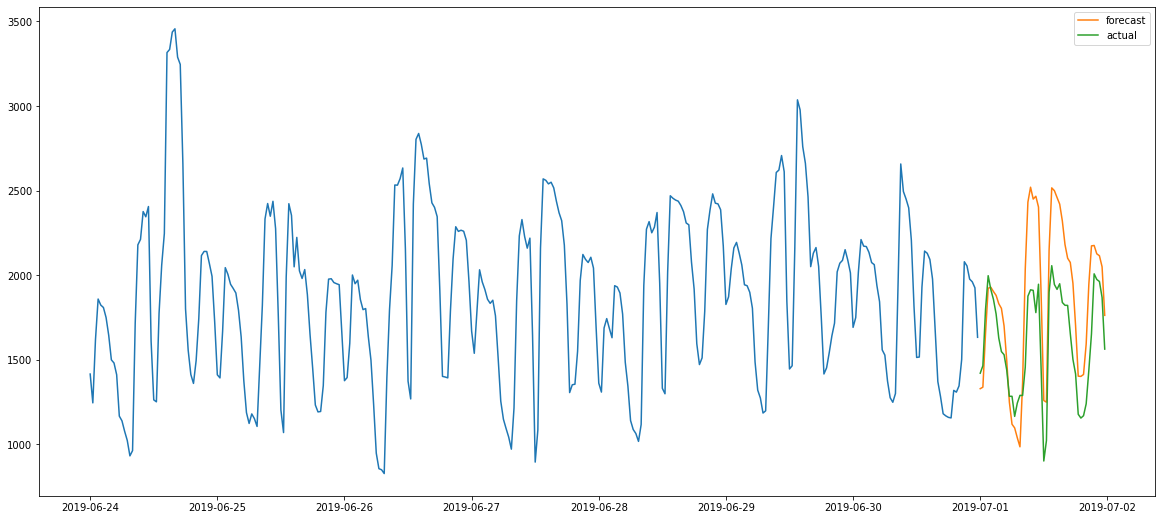

In [5]:
res_lasso = lasso.predict(df_scm_pp)
plt.figure(figsize=(20,9))
plt.plot(df_scm_pp.iloc[-48*7:].index, df_scm_pp.iloc[-48*7:].values)
plt.plot(res_lasso.index, res_lasso.values, label='forecast')
plt.plot(df_raw_scm.loc['2019-07-01'].index, df_raw_scm.loc['2019-07-01'].values, label='actual')
plt.legend()